<a href="https://colab.research.google.com/github/ArthAgrawal/Google_Stock_Prediction/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [3]:
print(np.min(training_set))
print(np.max(training_set))

279.12
816.68


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Creating DataFrame for display
df_X_train = pd.DataFrame(X_train, columns=[f'Time_Step_{i}' for i in range(X_train.shape[1])])
df_y_train = pd.DataFrame(y_train, columns=['Target'])

# Displaying the DataFrames
df_X_train.head()  # Display first few rows of X_train
df_y_train.head()  # Display first few rows of y_train

df_combined = pd.concat([df_X_train, df_y_train], axis=1)
df_combined

,Time_Step_0,Time_Step_1,Time_Step_2,Time_Step_3,Time_Step_4,Time_Step_5,Time_Step_6,Time_Step_7,Time_Step_8,Time_Step_9,...,Time_Step_51,Time_Step_52,Time_Step_53,Time_Step_54,Time_Step_55,Time_Step_56,Time_Step_57,Time_Step_58,Time_Step_59,Target
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,...,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,...,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633
1195,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,...,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251
1196,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,...,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251,0.937960


### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
38/38 [==============================] - 19s 189ms/step - loss: 0.0382
Epoch 2/120
38/38 [==============================] - 6s 161ms/step - loss: 0.0064
Epoch 3/120
38/38 [==============================] - 5s 138ms/step - loss: 0.0057
Epoch 4/120
38/38 [==============================] - 6s 160ms/step - loss: 0.0055
Epoch 5/120
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 6/120
38/38 [==============================] - 4s 108ms/step - loss: 0.0048
Epoch 7/120
38/38 [==============================] - 6s 149ms/step - loss: 0.0052
Epoch 8/120
38/38 [==============================] - 4s 107ms/step - loss: 0.0057
Epoch 9/120
38/38 [==============================] - 4s 108ms/step - loss: 0.0050
Epoch 10/120
38/38 [==============================] - 6s 146ms/step - loss: 0.0041
Epoch 11/120
38/38 [==============================] - 4s 107ms/step - loss: 0.0037
Epoch 12/120
38/38 [==============================] - 4s 106ms/step - loss: 0.0041
Epoch 13/120

In [19]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Saving the model

In [20]:
import tensorflow as tf

regressor.save('/content/drive/MyDrive/Google_Stock_Predictor.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 [==============================] - 2s 2s/step


array([[780.88696],
       [777.93616],
       [780.68774],
       [782.5948 ],
       [786.93823],
       [794.20013],
       [798.3799 ],
       [797.7333 ],
       [797.06854],
       [797.06854],
       [797.3947 ],
       [797.4495 ],
       [797.4668 ],
       [798.56024],
       [799.68646],
       [807.0175 ],
       [814.9652 ],
       [821.823  ],
       [822.5102 ],
       [812.3064 ]], dtype=float32)

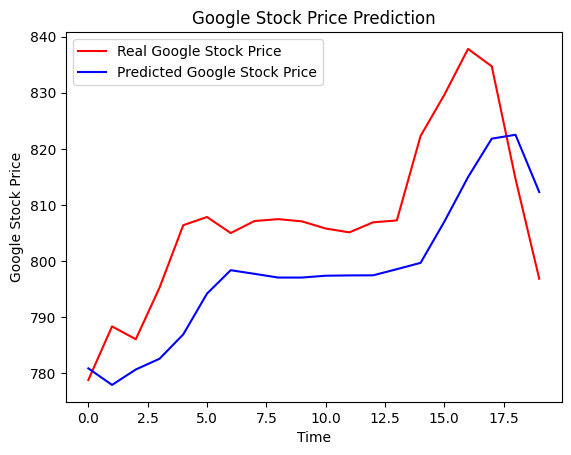

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()